# two_point_correlation_bf

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.metrics.two_point_correlation_bf))

---
 ## Documentation for ``two_point_correlation_bf``
 ---
**<span style="color:purple">two&#95;point&#95;correlation&#95;bf</span>_(im, spacing=10)_**


Calculates the two-point correlation function using brute-force (see Notes)


#### Parameters
* im : <b><i>ND-array</i></b>  The image of the void space on which the 2-point correlation is desired
* spacing : <b><i>int</i></b>  The space between points on the regular grid that is used to generate
	the correlation (see Notes)

#### Returns
* result : <b><i>named_tuple</i></b>  A tuple containing the x and y data for plotting the two-point
	correlation function, using the *args feature of matplotlib's plot
	function.  The x array is the distances between points and the y array
	is corresponding probabilities that points of a given distance both
	lie in the void space. The distance values are binned as follows:
	``bins = range(start=0, stop=np.amin(im.shape)/2, stride=spacing)``

#### Notes
The brute-force approach means overlaying a grid of equally spaced points
onto the image, calculating the distance between each and every pair of
points, then counting the instances where both pairs lie in the void space.

This approach uses a distance matrix so can consume memory very quickly for
large 3D images and/or close spacing.
---

## Import packages

In [2]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

## Create image and variables:

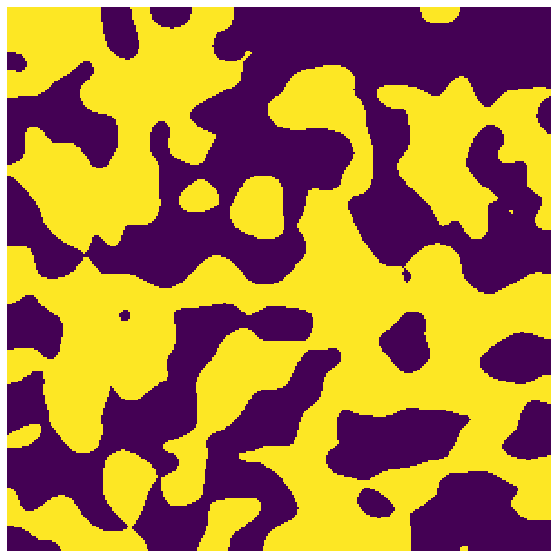

In [3]:
skel = ps.generators.blobs(shape=[300, 300])
im = ps.filters.prune_branches(skel)

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
spacing = 10

Output is a tuple with elements probability and distance

## Apply metric function:

### spacing

In [4]:
x = ps.metrics.two_point_correlation_bf(im=im, spacing=spacing)
xx = ps.metrics.two_point_correlation_bf(im=im, spacing=5)

Plot results:

Text(0.5, 1.0, 'Spacing = 5: Probability vs. Distance')

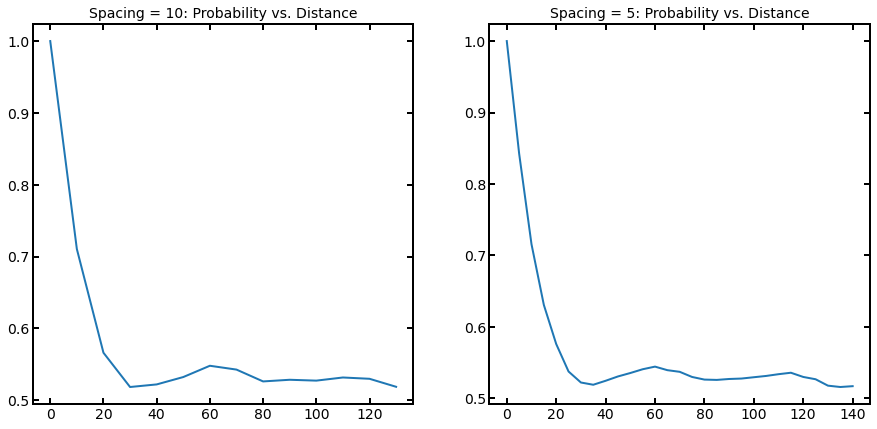

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.distance, x.probability)
ax[1].plot(xx.distance, xx.probability)
ax[0].set_title("Spacing = 10: Probability vs. Distance")
ax[1].set_title("Spacing = 5: Probability vs. Distance")